In [1]:
%matplotlib inline

import numpy as np
import cv2

from matplotlib import pyplot as plt
from matplotlib import image  as mpimg

In [2]:
scheme     = 'http'
hostip     = '192.168.1.6'
hostport   = 2112
streamname = 'stream.wmv'

In [3]:
# cap = cv2.VideoCapture('/dev/video0')
cap = cv2.VideoCapture('%s://%s:%d/%s' % (scheme,hostip,hostport,streamname))

In [5]:
ret,grab = cap.read()
ret

True

In [6]:
grab.shape

(720, 1280, 3)

In [8]:
type(grab[0,0,0])

numpy.uint8

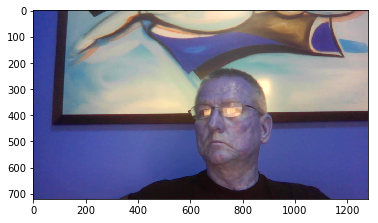

In [9]:
plt.imshow(grab)

In [11]:
barg = grab[:,:,(2,1,0)]

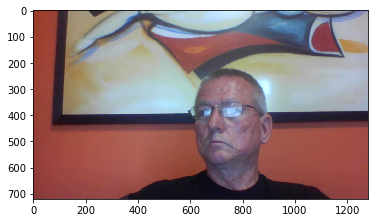

In [17]:
imgplt = plt.imshow(barg)

In [18]:
type(imgplt)

matplotlib.image.AxesImage

In [19]:
ret,grab2 = cap.read()
ret

True

In [20]:
barg2 = grab2[:,:,(2,1,0)]

In [21]:
imgplt.set_data(barg2)

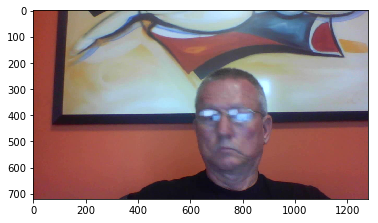

In [29]:
plt.imshow(barg)
plt.pause(1)
plt.imshow(barg2)

In [38]:
from matplotlib import animation

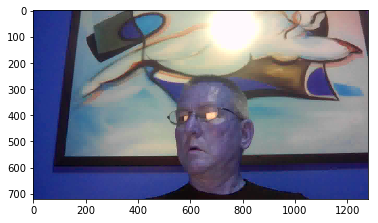

In [44]:
fig = plt.figure()
plt.ion()

# First frame:
ret,frame = cap.read()
if ret:
    im = plt.imshow(frame)
    

def update(i):
    ret,frame = cap.read()
    if ret:
        im.set_array(frame)
    return([im])

anim = animation.FuncAnimation(fig,update,frames=range(100),interval=50)

plt.show()

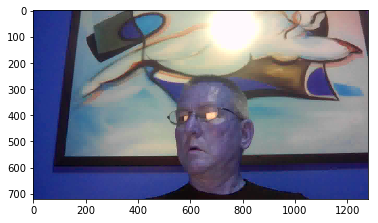

In [44]:
fig = plt.figure()
plt.ion()

# First frame:
ret,frame = cap.read()
if ret:
    im = plt.imshow(frame)
    

def update(i):
    ret,frame = cap.read()
    if ret:
        im.set_array(frame)
    return([im])

anim = animation.FuncAnimation(fig,update,frames=range(100),interval=50)

plt.show()

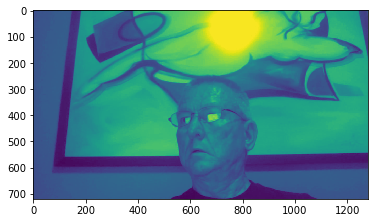

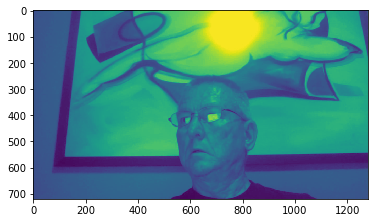

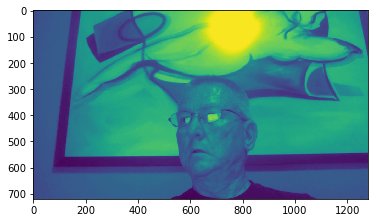

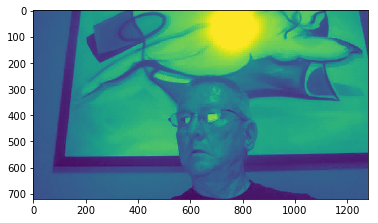

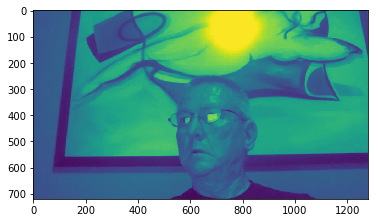

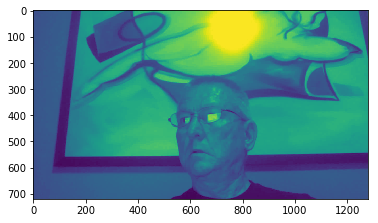

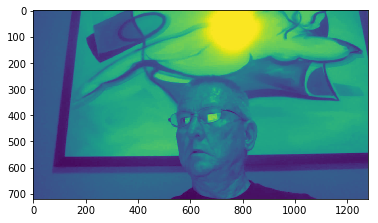

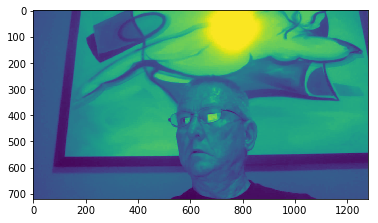

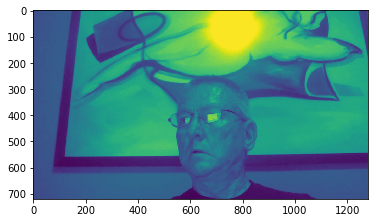

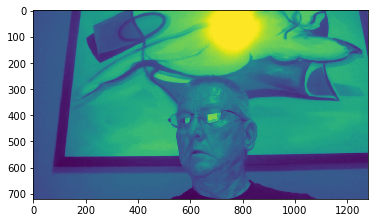

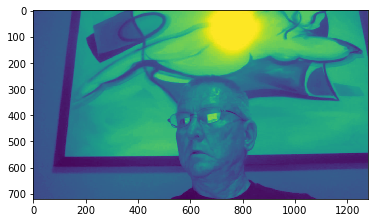

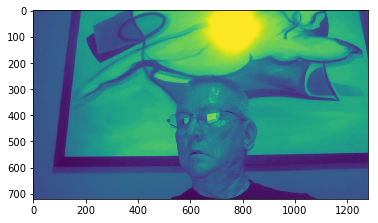

KeyboardInterrupt: 

In [47]:
firstFrame = True
img = None

# Establish the output area.
# fig = plt.figure()
# ax  = fig.gca()
# fig.show()

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    
    # Show the first frame directly.
    if img is None:
        img = plt.imshow(gray)
    else:
        img = plt.imshow(gray)
        # img.set_data(gray)
        
    plt.show()
    # plt.draw()
    plt.pause(0.0001)
    
    #if firstFrame:
    #    plt.imshow(frame)
    #    # plt.show()
    #    firstFrame = False
    #else:
    #    plt.imshow(frame)
    #    # view.set_data(gray)
    #    # plt.draw()
    #plt.clf()
    # plt.pause(50)
        
    # plt.imshow(gray)
    # plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
                break

In [6]:
# When everything done, release the capture
cap.release()